**Install dependencies**

In [1]:
# %%capture
# !pip install -U pillow numpy pandas
# !pip install -U cjm_pil_utils cjm_parallel_utils

**Import dependencies**

In [2]:
import random
from pathlib import Path
from functools import partial

from PIL import Image
import numpy as np

import pandas as pd
pd.set_option('max_colwidth', None)  # Do not truncate the contents of cells in the DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in the DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame

from cjm_pil_utils.core import get_img_files, stack_imgs, resize_img, crop_square
from cjm_parallel_utils.core import parallel

**Define content directory**

In [3]:
dataset_path = Path(f"/mnt/980_1TB_2/Datasets/pexels-110k-512p-min-jpg/")

**Set path to images folder**

In [4]:
img_dir = Path(dataset_path/"images/")

**Get image file paths**

In [5]:
# Get a list of the paths to the images in the images directory
img_paths = get_img_files(img_dir)

# Print the number of images in the images directory
print(len(img_paths))

109971


**Map image IDs to file paths**

In [6]:
img_path_dict = {int(path.stem.split('-')[-1]) : path for path in img_paths}
pd.DataFrame.from_dict(img_path_dict, orient='index').head()

,0
1000026,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000026.jpeg
1000037,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000037.jpeg
1000044,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000044.jpeg
1000054,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000054.jpeg
1000056,/mnt/980_1TB_2/Datasets/Pexels_Full_768p/images/1000056.jpeg


**Get image IDs**

In [7]:
img_ids = list(img_path_dict.keys())
len(img_ids)

109971

**Display sample image**

ID: 2629011


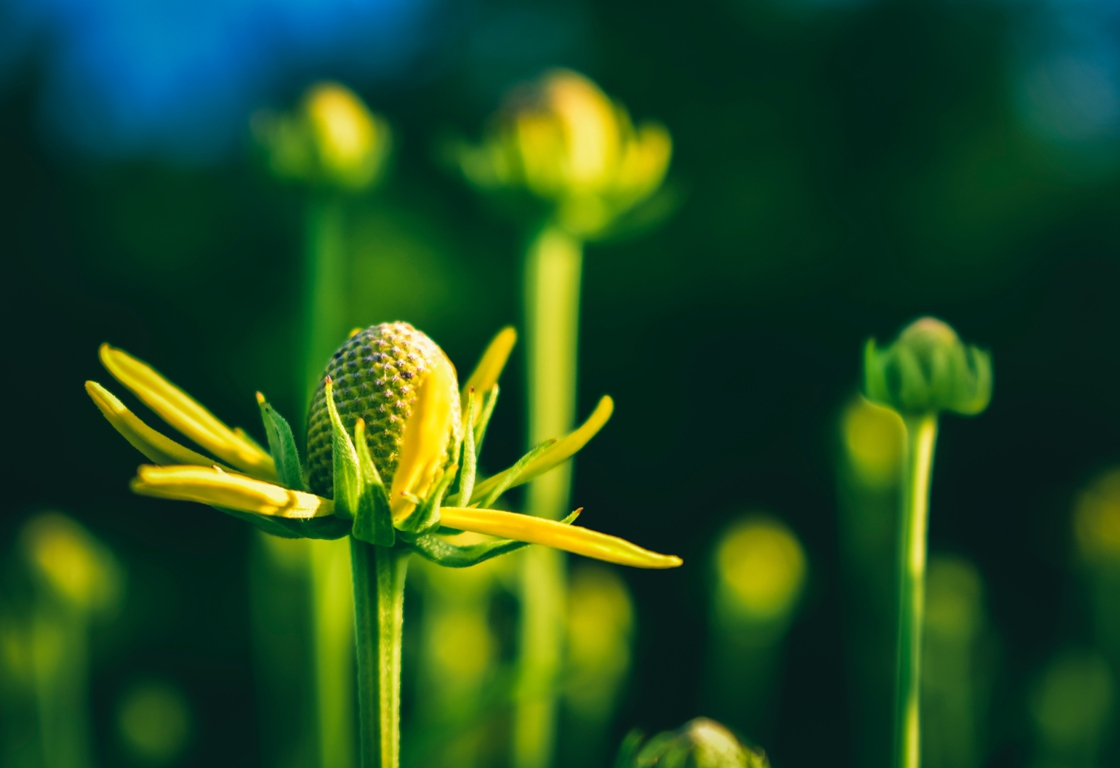

In [8]:
# Choose a random image ID from the list of image IDs
img_id = random.choice(img_ids)

print(f"ID: {img_id}")

# Open the image located at the path in the img_path_dict with the key of the current img_id
sample_img = Image.open(img_path_dict[img_id])

# Display the image
sample_img

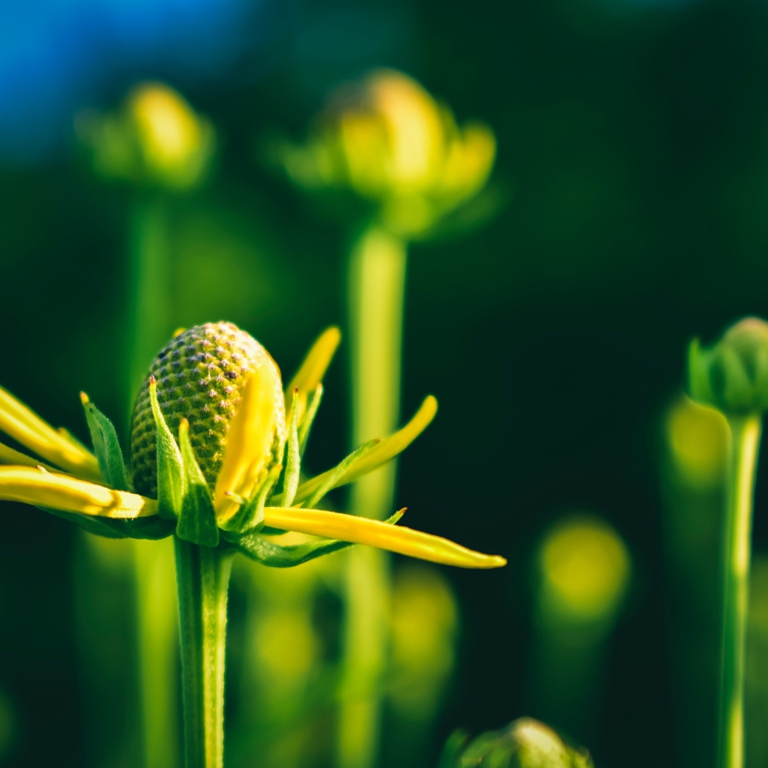

In [9]:
crop_square(sample_img)

In [10]:
def array_func(img_id:int, img_path_dict:dict, save_dir:'Path', quality:int=100):
    """
    This function takes an image ID, image path dictionary, save directory and image quality as input 
    and saves a square cropped version of the image.
    
    Parameters:
    img_id (int): Image ID
    img_path_dict (dict): Dictionary containing the image ID and corresponding image path
    save_dir (Path): Path to the directory where the cropped image will be saved
    quality (int): Quality of the saved image (default is 100)
    
    Returns:
    None
    """
    
    # Open the image using the image ID
    img = Image.open(img_path_dict[img_id])
    
    # Crop the image to make it square
    cropped_img = crop_square(img)
    
    # Create the save path for the cropped image
    save_path = Path(save_dir/f"square-{img_id}.{img.format.lower()}")
    
    # Save the cropped image
    cropped_img.save(save_path, img.format, quality=quality)

**Define save directory**

In [11]:
# Create a `Path` object for the directory that will be used to save the images.
save_dir = Path(f"{dataset_path.parent}/{dataset_path.stem}-square/images")

# Create the directory if it does not already exist.
save_dir.mkdir(parents=True, exist_ok=True)

# Print the `Path` object for the save directory.
save_dir

PosixPath('/mnt/980_1TB_2/Datasets/Pexels_Full_768p-square/images')

**Test array function**

In [12]:
array_func(img_id, img_path_dict, save_dir)

In [13]:
stop

NameError: name 'stop' is not defined

**Call `array_func` for every image ID**

In [ ]:
# Create a partial function with some parameters fixed
partial_func = partial(array_func, 
                       img_path_dict=img_path_dict, 
                       save_dir=save_dir)

# Execute the partial function in parallel over the 'img_ids' list
parallel(func=partial_func, arr=img_ids)